# Which other food intolerances is a lactose intolerant person likely to have, if they still have symptoms?

# Pymed API
- https://github.com/gijswobben/pymed

- See https://www.ncbi.nlm.nih.gov/pmc/tools/developers/ for "how to ..." explanations


## Intolerances to look for:
- Soja/soy: 17 (geen 'soya' want dat is spaans)
- gluten: 5
- suiker/sacharose/sucrose/sugar: 3 
- noten/nuts/nut: 2 
- hulpstoffen/hulpstof/(food) additives: 1


- Total =  28


## Terms in scientific papers to look for
For each (sub)term, look in abstract for...
- lactose, [...], intolerance
- lactose, [...], intolerant
- lactose, [nl term ...], intolerant
- lactose, [nl term ...], intolerantie


Count the number of results, despite positivie/negative/false relation.

In [1]:
pip install pymed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Search pubmed functions

In [2]:
#Code partly derived from Gijs Wobben (https://github.com/gijswobben/pymed/blob/master/examples/simple_search/main.py)
from pymed import PubMed
import json

#To retrieve lists of PubMed articles containing the three words in 'terms' 
#Maximally 'nr_results' articles are returned 
def query_pubmed_results(terms, nr_results):
  # PubMed object that GraphQL can use to query
  pubmed = PubMed(tool="uniTextMiningProject", email="lotte.degroot@ru.nl")

  # GraphQL query
  query = "Abstract:" + terms[0] + "&Abstract:" + terms[1] + "&Abstract:" + terms[2]
  print("QUERY IS {}".format(query)) #sanity check

  # Execute the query against the API
  results = pubmed.query(query, max_results=50)

  #Retrieve the articles
  articles = []
  articles_json = []
  types = []

  # Loop over the retrieved articles
  for article in results:
      entry_dict = json.loads(article.toJSON())

      articles.append(entry_dict)
  
      articles_json.append(article.toJSON())

      types.append(type(article))

  return articles, articles_json, types

In [3]:
#Returns only the abstracts of the articles
def get_abstracts(articles):
  abstracts = []
  for a in articles:
    abstracts.append(a['abstract'])
  return abstracts

In [6]:
#Only returns the abstracts that actually contains all three terms in 'terms'
def check_relevant_abstracts (abstracts, terms):
  relevant_abstracts = []
  for i in range(0, len(abstracts)):
    ab = abstracts[i]
    if ab is not None:
      if terms[0] in ab and terms[1] in ab and terms[2] in ab:
        relevant_abstracts.append(ab)
  return relevant_abstracts

In [7]:
#Calls all needed functions to return relevant abstracts based on given terms
def search_pubmed (terms, nr_results):
  articles, articles_json, types = query_pubmed_results(terms, nr_results)
  abstracts = get_abstracts(articles)
  relevant_abstracts = check_relevant_abstracts(abstracts, terms)
  return relevant_abstracts

In [73]:
#Check for duplicates in list with the results of all queries
def duplicate_check (all_results):
  no_duplicates = []
  if len(all_results) > 0:
    print("Before duplicate check: {} results".format(len(all_results)))
    to_set = set(all_results)
    no_duplicates = list(to_set)
    print("After duplicate check: {} results".format(len(no_duplicates)))
  else:
    print("No results were found so there are no duplicates")
  return no_duplicates

In [69]:
#Save the results to a local .txt file
def save_results_txt (results_no_duplicates, intolerance_name):
  file_name = r'' + intolerance_name + '_results.txt'
  if len(results_no_duplicates) > 0:
    with open(file_name, 'w') as fp:
      for abstract in soja_no_duplicates:
        fp.write(abstract + "\n\n")
    print("Results saved as {}".format(file_name))
  else:
    print("No results were found so there is nothing to save in a file")

# Soja intolerance

Term combinations to look for:
- EN: lactose, soy, intolerance (7 results)
- EN: lactose, soy, intolerant (0 results
- NL: lactose, soja, intolerant (0 results)
- NL: lactose, soja, intolerantie (0 results)

In [70]:
#Starting with maximum nr_results parameter at 20. If results exceed 20, increase number to look for
soja_results1 = search_pubmed(['lactose', 'soy', 'intolerance'], 20)
print("NR FOUND RESULTS =", len(soja_results1))

QUERY IS Abstract:lactose&Abstract:soy&Abstract:intolerance
NR FOUND RESULTS = 7


In [54]:
soja_results2 = search_pubmed(['lactose', 'soy', 'intolerant'], 20)
print("NR FOUND RESULTS =", len(soja_results2))

QUERY IS Abstract:lactose&Abstract:soy&Abstract:intolerant
NR FOUND RESULTS = 0


In [55]:
soja_results3 = search_pubmed(['lactose', 'soja', 'intolerant'], 20)
print("NR FOUND RESULTS =", len(soja_results3))

QUERY IS Abstract:lactose&Abstract:soja&Abstract:intolerant
NR FOUND RESULTS = 0


In [56]:
soja_results4 = search_pubmed(['lactose', 'soja', 'intolerantie'], 20)
print("NR FOUND RESULTS =", len(soja_results4))

QUERY IS Abstract:lactose&Abstract:soja&Abstract:intolerantie
NR FOUND RESULTS = 0


In [66]:
soja_all_results = soja_results1 + soja_results2 + soja_results3
soja_no_duplicates = duplicate_check(soja_all_results)
save_results_txt(soja_no_duplicates, 'soja')

Before duplicate check: 7 results
After duplicate check: 7 results
Results saved as soja_results.txt


# Gluten intolerance

Term combinations to look for:
- EN: lactose, gluten, intolerance (7 results)
- EN/NL: lactose, gluten, intolerant (0 results)
- NL: lactose, gluten, intolerantie (0 results)

In [12]:
gluten_results1 = search_pubmed(['lactose', 'gluten', 'intolerance'], 20)
print("NR FOUND RESULTS =", len(gluten_results1))

QUERY IS Abstract:lactose&Abstract:gluten&Abstract:intolerance
NR FOUND RESULTS = 7


In [13]:
gluten_results2 = search_pubmed(['lactose', 'gluten', 'intolerant'], 20)
print("NR FOUND RESULTS =", len(gluten_results2))

QUERY IS Abstract:lactose&Abstract:gluten&Abstract:intolerant
NR FOUND RESULTS = 0


In [14]:
gluten_results3 = search_pubmed(['lactose', 'gluten', 'intolerantie'], 20)
print("NR FOUND RESULTS =", len(gluten_results3))

QUERY IS Abstract:lactose&Abstract:gluten&Abstract:intolerantie
NR FOUND RESULTS = 0


In [67]:
gluten_all_results = gluten_results1 + gluten_results2 + gluten_results3
gluten_no_duplicates = duplicate_check(gluten_all_results) 
save_results_txt(gluten_no_duplicates, 'gluten')

Before duplicate check: 7 results
After duplicate check: 7 results
Results saved as gluten_results.txt


# Suiker results

Term combinations to look for:
- EN: lactose, sugar, intolerance (0 results)
- EN: lactose, sugar, intolerant (0 results)
- EN: lactose, sucrose, intolerance (1 results)
- EN: lactose, sucrose, intolerant (0 results)
- NL: lactose, suiker, intolerant (0 results)
- NL: lactose, suiker, intolerantie (0 results)
- NL: lactose, sacharose, intolerant (0 results)
- NL: lactose, sacharose, intolerantie (0 results)


In [16]:
sugar_results1 = search_pubmed(['lactose', 'sugar', 'intolerance'], 20)
print("NR FOUND RESULTS =", len(sugar_results1))

QUERY IS Abstract:lactose&Abstract:sugar&Abstract:intolerance
NR FOUND RESULTS = 0


In [17]:
sugar_results2 = search_pubmed(['lactose', 'sugar', 'intolerant'], 20)
print("NR FOUND RESULTS =", len(sugar_results2))

QUERY IS Abstract:lactose&Abstract:sugar&Abstract:intolerant
NR FOUND RESULTS = 0


In [18]:
sugar_results3 = search_pubmed(['lactose', 'sucrose', 'intolerance'], 20)
print("NR FOUND RESULTS =", len(sugar_results3))

QUERY IS Abstract:lactose&Abstract:sucrose&Abstract:intolerance
NR FOUND RESULTS = 1


In [19]:
sugar_results4 = search_pubmed(['lactose', 'sucrose', 'intolerant'], 20)
print("NR FOUND RESULTS =", len(sugar_results4))

QUERY IS Abstract:lactose&Abstract:sucrose&Abstract:intolerant
NR FOUND RESULTS = 0


In [20]:
sugar_results5 = search_pubmed(['lactose', 'suiker', 'intolerant'], 20)
print("NR FOUND RESULTS =", len(sugar_results5))

QUERY IS Abstract:lactose&Abstract:suiker&Abstract:intolerant
NR FOUND RESULTS = 0


In [21]:
sugar_results6 = search_pubmed(['lactose', 'suiker', 'intolerantie'], 20)
print("NR FOUND RESULTS =", len(sugar_results6))

QUERY IS Abstract:lactose&Abstract:suiker&Abstract:intolerantie
NR FOUND RESULTS = 0


In [22]:
sugar_results7 = search_pubmed(['lactose', 'sacharose', 'intolerant'], 20)
print("NR FOUND RESULTS =", len(sugar_results7))

QUERY IS Abstract:lactose&Abstract:sacharose&Abstract:intolerant
NR FOUND RESULTS = 0


In [23]:
sugar_results8 = search_pubmed(['lactose', 'sacharose', 'intolerantie'], 20)
print("NR FOUND RESULTS =", len(sugar_results8))

QUERY IS Abstract:lactose&Abstract:sacharose&Abstract:intolerantie
NR FOUND RESULTS = 0


In [76]:
suiker_all_results = sugar_results1 + sugar_results2 + sugar_results3 + sugar_results4 +sugar_results5 + sugar_results6 + sugar_results7 + sugar_results8 
suiker_no_duplicates = duplicate_check(suiker_all_results)
save_results_txt(suiker_no_duplicates, 'suiker')

Before duplicate check: 1 results
After duplicate check: 1 results
Results saved as suiker_results.txt


# Noten

Terms combinations to look for:
- lactose, nuts, intolerance (0 results)
- lactose, nuts, intolerant (0 results)
- lactose, nut, intolerance (0 results)
- lactose, nut, intolerant (0 results)
- lactose, noten, intolerant (0 results)
- lactose, noten, intolerantie (0 results)

In [24]:
noten_results1 = search_pubmed(['lactose', 'nuts', 'intolerance'], 20)
print("NR FOUND RESULTS =", len(noten_results1))

QUERY IS Abstract:lactose&Abstract:nuts&Abstract:intolerance
NR FOUND RESULTS = 0


In [25]:
noten_results2 = search_pubmed(['lactose', 'nuts', 'intolerant'], 20)
print("NR FOUND RESULTS =", len(noten_results2))

QUERY IS Abstract:lactose&Abstract:nuts&Abstract:intolerant
NR FOUND RESULTS = 0


In [26]:
noten_results3 = search_pubmed(['lactose', 'nut', 'intolerance'], 20)
print("NR FOUND RESULTS =", len(noten_results3))

QUERY IS Abstract:lactose&Abstract:nut&Abstract:intolerance
NR FOUND RESULTS = 0


In [27]:
noten_results4 = search_pubmed(['lactose', 'nut', 'intolerant'], 20)
print("NR FOUND RESULTS =", len(noten_results4))

QUERY IS Abstract:lactose&Abstract:nut&Abstract:intolerant
NR FOUND RESULTS = 0


In [28]:
noten_results5 = search_pubmed(['lactose', 'noten', 'intolerant'], 20)
print("NR FOUND RESULTS =", len(noten_results5))

QUERY IS Abstract:lactose&Abstract:noten&Abstract:intolerant
NR FOUND RESULTS = 0


In [29]:
noten_results6 = search_pubmed(['lactose', 'noten', 'intolerantie'], 20)
print("NR FOUND RESULTS =", len(noten_results6))

QUERY IS Abstract:lactose&Abstract:noten&Abstract:intolerantie
NR FOUND RESULTS = 0


In [74]:
noten_all_results = noten_results1 + noten_results2 + noten_results3 + noten_results4 + noten_results5 + noten_results6 
noten_no_duplicates = duplicate_check(noten_all_results)
save_results_txt(noten_no_duplicates, 'noten')

No results were found so there are no duplicates
No results were found so there is nothing to save in a file


# Hulpstoffen intolerantie

Term combinations to look for:
- lactose, additives, intolerance (2 results)
- lactose, additives, intolerant (2 results)
- lactose, food additives, intolerance (2 results)
- lactose, food additives, intolerant (2 results)
- lactose, hulpstoffen, intolerant (0 results)
- lactose, hulpstoffen, intolerantie (0 results)
- lactose, hulpstof, intolerant (0 results)
- lactose, hulpstof, intolerantie (0 results)


In [30]:
hulpstof_results1 = search_pubmed(['lactose', 'additives', 'intolerance'], 20)
print("NR FOUND RESULTS =", len(hulpstof_results1))

QUERY IS Abstract:lactose&Abstract:additives&Abstract:intolerance
NR FOUND RESULTS = 2


In [31]:
hulpstof_results2 = search_pubmed(['lactose', 'additives', 'intolerant'], 20)
print("NR FOUND RESULTS =", len(hulpstof_results2))

QUERY IS Abstract:lactose&Abstract:additives&Abstract:intolerant
NR FOUND RESULTS = 1


In [32]:
hulpstof_results3 = search_pubmed(['lactose', 'food additives', 'intolerance'], 20)
print("NR FOUND RESULTS =", len(hulpstof_results3))

QUERY IS Abstract:lactose&Abstract:food additives&Abstract:intolerance
NR FOUND RESULTS = 2


In [33]:
hulpstof_results4 = search_pubmed(['lactose', 'food additives', 'intolerant'], 20)
print("NR FOUND RESULTS =", len(hulpstof_results4))

QUERY IS Abstract:lactose&Abstract:food additives&Abstract:intolerant
NR FOUND RESULTS = 1


In [36]:
hulpstof_results5 = search_pubmed(['lactose', 'hulpstoffen', 'intolerant'], 20)
print("NR FOUND RESULTS =", len(hulpstof_results5))

QUERY IS Abstract:lactose&Abstract:hulpstoffen&Abstract:intolerant
NR FOUND RESULTS = 0


In [37]:
hulpstof_results6 = search_pubmed(['lactose', 'hulpstoffen', 'intolerantie'], 20)
print("NR FOUND RESULTS =", len(hulpstof_results6))

QUERY IS Abstract:lactose&Abstract:hulpstoffen&Abstract:intolerantie
NR FOUND RESULTS = 0


In [38]:
hulpstof_results7 = search_pubmed(['lactose', 'hulpstof', 'intolerant'], 20)
print("NR FOUND RESULTS =", len(hulpstof_results7))

QUERY IS Abstract:lactose&Abstract:hulpstof&Abstract:intolerant
NR FOUND RESULTS = 0


In [39]:
hulpstof_results8 = search_pubmed(['lactose', 'hulpstof', 'intolerantie'], 20)
print("NR FOUND RESULTS =", len(hulpstof_results8))

QUERY IS Abstract:lactose&Abstract:hulpstof&Abstract:intolerantie
NR FOUND RESULTS = 0


In [75]:
hulpstof_all_results = hulpstof_results1 + hulpstof_results2 + hulpstof_results3 + hulpstof_results4 + hulpstof_results5 + hulpstof_results6 + hulpstof_results7 + hulpstof_results8
hulpstof_no_duplicates = duplicate_check(hulpstof_all_results)
save_results_txt(hulpstof_no_duplicates, 'hulpstoffen')

Before duplicate check: 6 results
After duplicate check: 3 results
Results saved as hulpstoffen_results.txt


# Results lined up

In [82]:
soja_pubmed_count = len(soja_no_duplicates)
soja_found = ['soy']
gluten_pubmed_count = len(gluten_no_duplicates)
gluten_found = ['gluten']
suiker_pubmed_count = len(suiker_no_duplicates)
suiker_found = ['sucrose']
noten_pubmed_count = len(noten_no_duplicates)
noten_found = ['']
hulpstof_pubmed_count = len(hulpstof_no_duplicates)
hulpstof_found = ['food additives']

result_counts = [soja_pubmed_count] + [gluten_pubmed_count] + [suiker_pubmed_count] + [noten_pubmed_count] + [hulpstof_pubmed_count]
results_found = soja_found + gluten_found + suiker_found + noten_found + hulpstof_found

print(result_counts)
print(results_found)

[7, 7, 1, 0, 3]
['soy', 'gluten', 'sucrose', 'food additives']


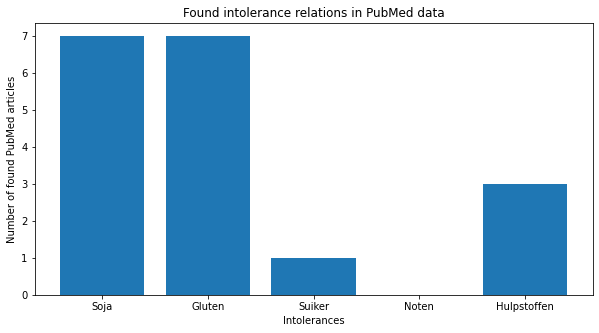

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
count_labels = ["Soja", "Gluten", "Suiker", "Noten", "Hulpstoffen"]
plt.bar(count_labels, result_counts)
plt.title("Found intolerance relations in PubMed data")
plt.xlabel("Intolerances")
plt.ylabel("Number of found PubMed articles")
plt.show()